# Interactions and Polynomials

__Import libraries__

In [57]:
# essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

# dataset
from sklearn.datasets import load_boston

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

We can enrich features representation by adding interaction features and polynomial features of the orginal data. In here we add back the original feature to add slope.

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
bins = np.linspace(-3, 3, 11)
which_bins = np.digitize(X, bins=bins)

encoder = OneHotEncoder(sparse=False).fit(which_bins)
X_binned = encoder.transform(which_bins)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [11]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))
line_combined = np.hstack([line, line_binned])

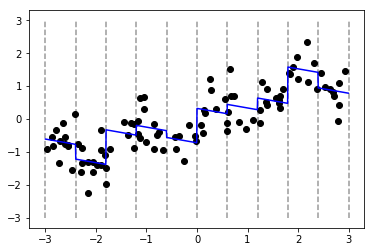

In [21]:
reg = LinearRegression().fit(X_combined, y)

plt.plot(line, reg.predict(line_combined), '-b', label='Linear Regression Combined')
plt.scatter(X, y, c='k')
plt.vlines(bins, -3, 3, color='k', linestyle='--', alpha=0.4);

In this example the model learned an offset for each bin, together with a slope. In here we have the same slope for each bin, not so good. Then we try to add slope independently for each bin.

In [22]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


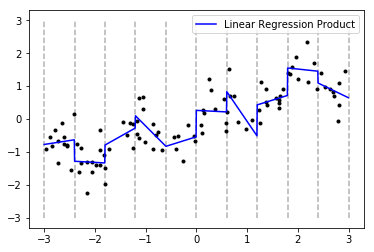

In [29]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
                          
plt.plot(line, reg.predict(line_product), '-b', label='Linear Regression Product')               
plt.scatter(X, y, marker='.', c='k')
plt.vlines(bins, -3, 3, linestyle='--', alpha=0.3)
plt.legend();

In [32]:
# include polynomials up to x ** 10
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False).fit(X)
X_poly = poly.transform(X)

In [33]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [34]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [35]:
X_poly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [36]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

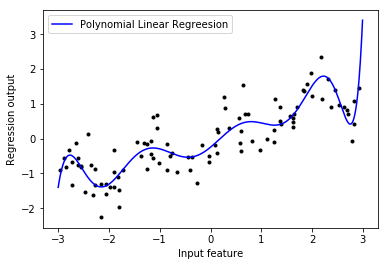

In [40]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), '-b', label='Polynomial Linear Regreesion')
plt.scatter(X, y, marker='.', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best');

- Polynomial features yield a very smooth fit on this one-dimensional data.
- However, polynomial of high degree tend to behave in extreme ways on the the boundaries or in regions with little data.

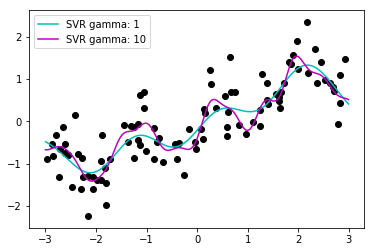

In [45]:
for gamma, color in zip([1, 10], ['c', 'm']):
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), c=color, label='SVR gamma: {}'.format(gamma))

plt.scatter(X[:, 0], y, c='k');
plt.legend(loc='best');

- Using a more complex model such as SVR, we are able to learn a similary complex prediction to the polynomial regression without an explicit transformation of the features.

In [47]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale the data
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [51]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


'1' is a constant feature, 'x0' to 'x12' are the original features.

In [56]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Interactions and polynomial features gave us a good boost in performance when using ridge. When using more complex model like random forest, let's see what happen:

In [58]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.790
Score with interactions: 0.773


Without additional features, we see that random forest beats ridge, and adding interactions and polynomials actually decreases performance slightly.

---

# IMPORTANT POINTS

- Binning and Discretization and Adding Interactions:
    - Process:
        - Load the data
        - Create bins, with np.linspace or np.arange
        - Digitize the data with np.digitize(X, bins=bins), return which_bins
        - Instantiate the encoder (OneHotEncoder), sparse=False
        - encoder.fit(which_bins)
        - X_binned = encoder.transform(X)
        - Now the features has features as many as bins.
     - Combining original and bins features.
         - Use np.hstack()
         - Slope is the same for each bin
     - Combining original slope and bins features.
         - Use np.hstack()
         - Slopes are different for each bin. 
- Polynomials:
    - Process:
        - Load data
        - Instantiate the PolynomialFeatures(n_degrees=..., include_bias).fit(X)
        - Transform, poly.transform(X)
- Using a more complex model like SVR we don't have to transform the data (adding interactions and polynomial features)
- Adding interactions and polynomial features will give us boosting when using linear models (Ridge)
- More complex model like RandomForest, the performance is good without interactions and polynomials.